In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [111]:
df = pd.read_csv('cleaned_data.csv')
df

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,5951,48,radio/TV,bad
1,49,male,1,own,little,2096,12,education,good
2,45,male,2,free,little,7882,42,furniture/equipment,good
3,53,male,2,free,little,4870,24,car,bad
4,53,male,2,own,quite rich,2835,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...
812,31,female,1,own,little,1736,12,furniture/equipment,good
813,40,male,3,own,little,3857,30,car,good
814,38,male,2,own,little,804,12,radio/TV,good
815,23,male,2,free,little,1845,45,radio/TV,bad


In [112]:
#13 ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)
px.box(y=df['Age'])

In [113]:
px.box(y=df['Credit amount'])

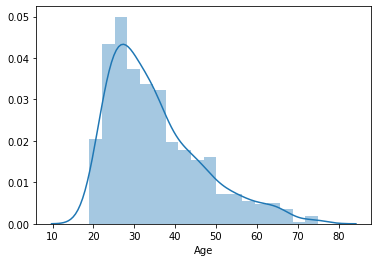

In [114]:
sns.distplot(df['Age'])

In [115]:
df = pd.get_dummies(df, drop_first = True)
df

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,22,2,5951,48,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,49,1,2096,12,1,1,0,0,0,0,0,0,1,0,0,0,0,1
2,45,2,7882,42,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,53,2,4870,24,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,53,2,2835,24,1,1,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,31,1,1736,12,0,1,0,0,0,0,0,0,0,1,0,0,0,1
813,40,3,3857,30,1,1,0,0,0,0,1,0,0,0,0,0,0,1
814,38,2,804,12,1,1,0,0,0,0,0,0,0,0,1,0,0,1
815,23,2,1845,45,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [116]:
#12 สร้าง train/test split ของข้อมูล 
from sklearn.model_selection import train_test_split

In [117]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [119]:
# train model
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [120]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [121]:
predicted = dtree.predict(X_test)

In [122]:
confusion_matrix(y_test, predicted)

array([[21, 27],
       [40, 76]], dtype=int64)

In [123]:
print('Decision Tree default')
print('Accuracy = {:.4f}'.format(accuracy_score(y_test,predicted)))
print('Precision ={:.4f}'.format(precision_score(y_test,predicted)))
print('Recall = {:.4f}'.format(recall_score(y_test,predicted)))
print('F1 score ={:.4f}'.format(f1_score(y_test,predicted)))

Decision Tree default
Accuracy = 0.5915
Precision =0.7379
Recall = 0.6552
F1 score =0.6941


# Normalization

In [124]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [125]:
df_minmax = min_max_scaler.fit_transform(df)
df_minmax

array([[0.05357143, 0.66666667, 0.31368989, ..., 0.        , 0.        ,
        0.        ],
       [0.53571429, 0.33333333, 0.10157368, ..., 0.        , 0.        ,
        1.        ],
       [0.46428571, 0.66666667, 0.41994057, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.33928571, 0.66666667, 0.03048311, ..., 0.        , 0.        ,
        1.        ],
       [0.07142857, 0.66666667, 0.08776274, ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 0.66666667, 0.23803235, ..., 0.        , 0.        ,
        1.        ]])

In [126]:
df_norm = pd.DataFrame(df_minmax, columns=df.columns)
df_norm

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,0.053571,0.666667,0.313690,0.647059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.535714,0.333333,0.101574,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.464286,0.666667,0.419941,0.558824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.607143,0.666667,0.254209,0.294118,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.607143,0.666667,0.142236,0.294118,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,0.214286,0.333333,0.081765,0.117647,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
813,0.375000,1.000000,0.198470,0.382353,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
814,0.339286,0.666667,0.030483,0.117647,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
815,0.071429,0.666667,0.087763,0.602941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [127]:
X_norm = df_norm.drop(['Risk_good'], axis=1)
y_norm = df_norm['Risk_good']

In [128]:
from sklearn.model_selection import train_test_split
X_train_norm, X_test_norm, y_train_norm, y_test_norm =train_test_split(X_norm, y_norm, test_size=0.2, random_state=35)

In [129]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train_norm, y_train_norm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [130]:
norm_predicted = dtree.predict(X_test_norm)

In [131]:
confusion_matrix(y_test_norm, norm_predicted)

array([[21, 27],
       [38, 78]], dtype=int64)

In [132]:
print('Decision Tree normalization')
print('Accuracy = {:.4f}'.format(accuracy_score(y_test,norm_predicted)))
print('Precision ={:.4f}'.format(precision_score(y_test,norm_predicted)))
print('Recall = {:.4f}'.format(recall_score(y_test,norm_predicted)))
print('F1 score ={:.4f}'.format(f1_score(y_test,norm_predicted)))

Decision Tree normalization
Accuracy = 0.6037
Precision =0.7429
Recall = 0.6724
F1 score =0.7059


In [133]:
#17 หาค่า parameter combination ที่ดีที่สุด สำหรับ Dataset นี้ โดยใช้ GridSearch (Hyperparameter Tuning)
from sklearn.model_selection import GridSearchCV
param_combination = {'max_depth':[4,8,16,32,64], 'min_samples_leaf':[1,2,4,8,12,16]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_combination, verbose=1)

In [134]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                 

In [135]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 8}

In [136]:
grid_predicted = grid_search.predict(X_test)

In [137]:
confusion_matrix(y_test, grid_predicted)

array([[ 11,  37],
       [  9, 107]], dtype=int64)

In [138]:
print('Decision Tree+HT')
print('Accuracy = {:.4f}'.format(accuracy_score(y_test,grid_predicted)))
print('Precision ={:.4f}'.format(precision_score(y_test,grid_predicted)))
print('Recall = {:.4f}'.format(recall_score(y_test,grid_predicted)))
print('F1 score ={:.4f}'.format(f1_score(y_test,grid_predicted)))

Decision Tree+HT
Accuracy = 0.7195
Precision =0.7431
Recall = 0.9224
F1 score =0.8231


In [139]:
#18 เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features
df = pd.read_csv('cleaned_data.csv')
df

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,5951,48,radio/TV,bad
1,49,male,1,own,little,2096,12,education,good
2,45,male,2,free,little,7882,42,furniture/equipment,good
3,53,male,2,free,little,4870,24,car,bad
4,53,male,2,own,quite rich,2835,24,furniture/equipment,good
...,...,...,...,...,...,...,...,...,...
812,31,female,1,own,little,1736,12,furniture/equipment,good
813,40,male,3,own,little,3857,30,car,good
814,38,male,2,own,little,804,12,radio/TV,good
815,23,male,2,free,little,1845,45,radio/TV,bad


In [140]:
df = df[['Credit amount','Housing', 'Purpose','Risk']]
df

,Credit amount,Housing,Purpose,Risk
0,5951,own,radio/TV,bad
1,2096,own,education,good
2,7882,free,furniture/equipment,good
3,4870,free,car,bad
4,2835,own,furniture/equipment,good
...,...,...,...,...
812,1736,own,furniture/equipment,good
813,3857,own,car,good
814,804,own,radio/TV,good
815,1845,free,radio/TV,bad


In [141]:
df_new = pd.get_dummies(df, drop_first = True)
df_new

,Credit amount,Housing_own,Housing_rent,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_good
0,5951,1,0,0,0,0,0,1,0,0,0
1,2096,1,0,0,0,1,0,0,0,0,1
2,7882,0,0,0,0,0,1,0,0,0,1
3,4870,0,0,1,0,0,0,0,0,0,0
4,2835,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
812,1736,1,0,0,0,0,1,0,0,0,1
813,3857,1,0,1,0,0,0,0,0,0,1
814,804,1,0,0,0,0,0,1,0,0,1
815,1845,0,0,0,0,0,0,1,0,0,0


In [142]:
X = df_new.drop(['Risk_good'],axis=1)
y = df_new['Risk_good']

In [143]:
X_train_few, X_test_few, y_train_few, y_test_few = train_test_split(X,y ,test_size=0.2, random_state=35)

In [144]:
from sklearn.model_selection import GridSearchCV
param_combination = {'max_depth':[4,8,16,32,64], 'min_samples_leaf':[1,2,4,8,12,16]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_combination, verbose=1)

In [145]:
grid_search.fit(X_train_few, y_train_few)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64],
                 

In [146]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 2}

In [147]:
grid_few_predicted = grid_search.predict(X_test_few)

In [148]:
confusion_matrix(y_test_few, grid_few_predicted)

array([[  7,  41],
       [ 14, 102]], dtype=int64)

In [149]:
print('Decision Tree(few features+HT')
print('Accuracy = {:.4f}'.format(accuracy_score(y_test,grid_few_predicted)))
print('Precision ={:.4f}'.format(precision_score(y_test,grid_few_predicted)))
print('Recall = {:.4f}'.format(recall_score(y_test,grid_few_predicted)))
print('F1 score ={:.4f}'.format(f1_score(y_test,grid_few_predicted)))

Decision Tree(few features+HT
Accuracy = 0.6646
Precision =0.7133
Recall = 0.8793
F1 score =0.7876


In [150]:
#Ans: สรุป  Decision Tree แบบเลือกบางfeature ได้ผลแย่กว่าเลือก all features

In [151]:
#19 ทำ Visualization ของค่า F1 Score ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
columns = ['Accuracy','Precision','Recall','F1score']
rows = ['Default','GridSearch','Normalization']
values = [['56.71', '72.28', '62.93','67.28'],
               ['71.95', '74.31','92.24','82.31'],
               ['61.59', '75.24','68.10','71.49']]

In [152]:
df_score = pd.DataFrame(values,rows,columns)
df_score

,Accuracy,Precision,Recall,F1score
Default,56.71,72.28,62.93,67.28
GridSearch,71.95,74.31,92.24,82.31
Normalization,61.59,75.24,68.10,71.49


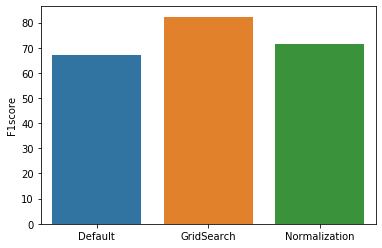

In [153]:
sns.barplot(x=rows, y='F1score', data=df_score)

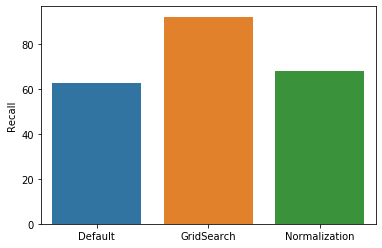

In [154]:
#20 ทำ Visualization ของค่า Recall ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
sns.barplot(x=rows, y='Recall', data=df_score)

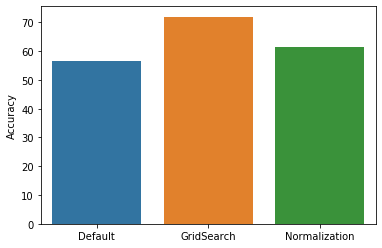

In [155]:
#21 ทำ Visualization ของค่า Accuracy ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
sns.barplot(x=rows, y='Accuracy', data=df_score)